In [15]:
# Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import datetime

# Set data files"
student_life_file = r"C:\Users\yunyi\OneDrive\Desktop\Data BootCamp\Project 1 Group 2\Resource\Student Life Cleaned.csv"
sleep_efficiency_data_file = r"C:\Users\yunyi\OneDrive\Desktop\Data BootCamp\Project 1 Group 2\Resource\Sleep_Efficiency.csv"
student_study_data_file = r"C:\Users\yunyi\OneDrive\Desktop\Data BootCamp\Project 1 Group 2\Resource\Student Study data.csv"

#Read data files
student_life = pd.read_csv(student_life_file)
sleep_efficiency = pd.read_csv(sleep_efficiency_data_file)
student_study_data = pd.read_csv(student_study_data_file)


In [3]:
# look at sleep_efficiency values
sleep_efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
sleep_efficiency.drop(columns=["Caffeine consumption", "Alcohol consumption", "Smoking status", "Exercise frequency", "Awakenings", "REM sleep percentage", "Deep sleep percentage","Light sleep percentage", "ID"])


,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76
...,...,...,...,...,...,...
447,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91
448,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74
449,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55
450,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76


In [13]:
# look at Student Life values
student_life.head()

,uid,Bed Time,Wakeup Time,Actual Sleep Duration,Overall Sleep Quality,Trouble sleep,GPA
0,u01,1:00 AM,11:00 AM,10,Very good,Several days,2.86
1,u01,3:00 AM,11:00 AM,7,Fairly good,Several days,2.86
2,u02,1:00 AM,9:00 AM,7,Fairly good,More than half the days,3.51
3,u02,1:00 AM,9:00 AM,8,Fairly good,More than half the days,3.51
4,u04,11:30 PM,6:00 AM,7,Fairly good,Not at all,3.03


In [23]:
gpa_level = [0,3,3.5,4]
grade_level =["Low","Medium","High"]
student_life["Grade"]=pd.cut(student_life["GPA"],gpa_level,labels=grade_level,right=True)
student_life

,uid,Bed Time,Wakeup Time,Actual Sleep Duration,Overall Sleep Quality,Trouble sleep,GPA,Grade
0,u01,1:00 AM,11:00 AM,10,Very good,Several days,2.86,Low
1,u01,3:00 AM,11:00 AM,7,Fairly good,Several days,2.86,Low
2,u02,1:00 AM,9:00 AM,7,Fairly good,More than half the days,3.51,High
3,u02,1:00 AM,9:00 AM,8,Fairly good,More than half the days,3.51,High
4,u04,11:30 PM,6:00 AM,7,Fairly good,Not at all,3.03,Medium
5,u04,11:30 PM,7:00 AM,7,Fairly good,Not at all,3.03,Medium
6,u05,11:30 PM,8:00 AM,8,Very good,Several days,3.68,High
7,u05,1:00 AM,8:00 AM,6,Fairly good,Several days,3.68,High
8,u07,12:00 AM,9:00 AM,8,Fairly good,Not at all,3.47,Medium
9,u07,5:00 AM,2:00 PM,8,Fairly bad,Not at all,3.47,Medium


In [24]:
quality_by_grade=student_life.groupby(["Grade","Overall Sleep Quality"]).mean()["Actual Sleep Duration"]
quality_by_grade

C:\Users\yunyi\AppData\Local\Temp\ipykernel_25348\3918142838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quality_by_grade=student_life.groupby(["Grade","Overall Sleep Quality"]).mean()["Actual Sleep Duration"]


Grade   Overall Sleep Quality
Low     Fairly bad               7.000000
        Fairly good              7.200000
        Very bad                      NaN
        Very good                9.000000
Medium  Fairly bad               6.500000
        Fairly good              7.500000
        Very bad                 4.000000
        Very good                7.000000
High    Fairly bad               6.000000
        Fairly good              7.058824
        Very bad                 4.000000
        Very good                7.333333
Name: Actual Sleep Duration, dtype: float64

In [25]:
Sleep_Duration_data=pd.DataFrame(quality_by_grade)
Sleep_Duration_data

Actual Sleep Duration
Grade  Overall Sleep Quality                       
Low    Fairly bad                          7.000000
       Fairly good                         7.200000
       Very bad                                 NaN
       Very good                           9.000000
Medium Fairly bad                          6.500000
       Fairly good                         7.500000
       Very bad                            4.000000
       Very good                           7.000000
High   Fairly bad                          6.000000
       Fairly good                         7.058824
       Very bad                            4.000000
       Very good                           7.333333

<Axes: xlabel='Grade,Overall Sleep Quality'>

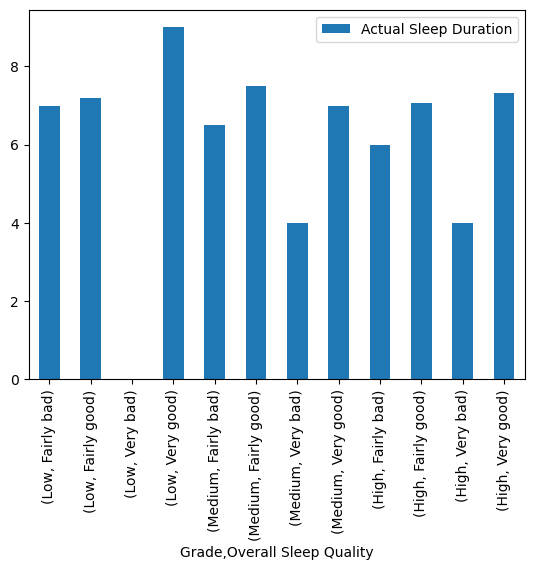

In [26]:
Sleep_Duration_data.plot(kind="bar")

In [42]:
# Visualize pairplot of df
sns.pairplot(Sleep_Duration_data.hue="Grade")

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2345294984.py, line 2)

In [43]:
# look at student study data values
student_study_data.head()

,Name,Date,Day,Marital Status,Gender,Study Hour,Sleep Hour,Weekend,Age,CGPA
0,Karim,28/6/2022,Sunday,1.0,1,4.0,6,0,23,3.00 - 3.49
1,Karim,29/6/2022,Monday,1.0,1,3.0,6,0,23,3.00 - 3.49
2,Karim,30/6/2022,Tuesday,1.0,1,3.0,7,0,23,3.00 - 3.49
3,Karim,1/7/2022,Wednesday,1.0,1,2.0,5,0,23,3.00 - 3.49
4,Karim,2/7/2022,Thursday,1.0,1,5.0,6,0,23,3.00 - 3.49
